In [5]:
!pip install xgboost

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
#from xgboost.sklearn import XGBClassifier 
#%run load.py

In [7]:
data = pd.read_csv("/Users/wibisono/Downloads/data_unsplit.csv")

FileNotFoundError: [Errno 2] File /Users/wibisono/Downloads/data_unsplit.csv does not exist: '/Users/wibisono/Downloads/data_unsplit.csv'

In [14]:
data.head()

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature5998,feature5999,feature6000,feature6001,feature6002,feature6003,feature6004,feature6005,feature6006,emotion_idx
0,1,45,28,6,16,37,22,1,25,176,...,111,168,225,56,113,170,57,114,57,1
1,2,44,27,5,19,36,20,2,24,170,...,111,169,228,58,116,175,58,117,59,1
2,3,42,24,3,18,33,15,5,23,153,...,102,156,211,53,107,162,54,109,55,1
3,4,47,27,7,15,31,13,8,29,166,...,112,173,234,60,121,182,61,122,61,1
4,5,35,22,1,19,36,19,0,18,161,...,102,157,211,52,107,161,55,109,54,1


In [3]:
X_dis=data.iloc[:,1:-1]
y_dis=data["emotion_idx"]
train_X_dis,test_X_dis,train_y_dis,test_y_dis=tts(X_dis,y_dis,test_size=0.2,random_state=3662)

In [11]:
train_X_dis.shape

(2000, 6006)

In [12]:
test_X_dis.shape

(500, 6006)

In [10]:
xgboost_opt = xgb.XGBClassifier(max_depth = 4,
                                n_estimators = 50,
                                learning_rate = 0.1)

In [16]:
xgboost_opt.fit(train_X_dis, train_y_dis)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [69]:
importance = xgboost_opt.feature_importances_

In [73]:
indices = np.argsort(-importance)[:20]

In [74]:
indices

array([5659, 5017, 5231, 5416, 3394, 4130, 3673, 2194, 3484, 4268, 3248,
       2850, 3250, 5772, 5712, 4686, 5665,  265, 4837, 4694])

In [77]:
train_X_dis_new = train_X_dis.iloc[:,indices]
test_X_dis_new = test_X_dis.iloc[:,indices]

In [98]:
from sklearn.model_selection import GridSearchCV
xgboost_parm_gs = {
     'max_depth': [2,4,8,16,32,64],
    'n_estimator': [50,100],
    'learning_rate': [0.001, 0.01, 0.1]
}
xgboost_model_gs = xgb.XGBClassifier()
xgboost_gsearch = GridSearchCV(estimator = xgboost_model_gs, 
                        param_grid = xgboost_parm_gs, 
                        scoring ='accuracy',
                        cv = 3,
                        n_jobs = 10,
                        verbose=3,
                        return_train_score=True
                       )
xgboost_gsearch.fit(train_X_dis_new,train_y_dis)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   16.5s
[Parallel(n_jobs=10)]: Done 108 out of 108 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,

In [110]:
xgboost_gsearch.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimator': 50}

In [127]:
xgboost_opt_new = xgb.XGBClassifier(max_depth = 2,
                                    n_estimators = 50,
                                    learning_rate = 0.1)

xgboost_opt_new.fit(train_X_dis_new, train_y_dis)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [128]:
from sklearn.metrics import accuracy_score  
print("Training dataset Accuracy")
train_preds = xgboost_opt_new.predict(train_X_dis_new)
train_accuracy = accuracy_score(train_y_dis, train_preds) 
print(train_accuracy)

Training dataset Accuracy
0.4895


In [129]:
print("Testing dataset Accuracy")
test_preds = xgboost_opt_new.predict(test_X_dis_new)
test_accuracy = accuracy_score(test_y_dis, test_preds) 
print(test_accuracy)

Testing dataset Accuracy
0.304


In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
gnb = GaussianNB()
gnb.partial_fit(train_X_dis_scaled, train_y_dis, np.unique(train_y_dis))

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
accuracy_score(gnb.predict(standard_scaler.fit_transform(test_X_dis)), test_y_dis)

0.28

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
train_X_dis_scaled = min_max_scaler.fit_transform(train_X_dis)
train_X_dis_scaled

array([[0.2972973 , 0.1875    , 0.05357143, ..., 0.65957447, 0.52380952,
        0.4109589 ],
       [0.51351351, 0.4375    , 0.03571429, ..., 0.44680851, 0.37142857,
        0.32876712],
       [0.51351351, 0.34375   , 0.        , ..., 0.42553191, 0.36190476,
        0.32876712],
       ...,
       [0.43243243, 0.28125   , 0.05357143, ..., 0.63829787, 0.54285714,
        0.45205479],
       [0.62162162, 0.4375    , 0.01785714, ..., 0.44680851, 0.45714286,
        0.45205479],
       [0.51351351, 0.40625   , 0.08928571, ..., 0.53191489, 0.45714286,
        0.39726027]])

In [29]:
clf2 = LogisticRegression().fit(train_X_dis_scaled, train_y_dis)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
accuracy_score(clf2.predict(min_max_scaler.fit_transform(test_X_dis)), test_y_dis)

0.49

In [31]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [33]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf.fit(train_X_dis_scaled, train_y_dis)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
clf.best_params_

{'C': 0.1}

In [36]:
clf3 = LogisticRegression(C = 0.1).fit(train_X_dis_scaled, train_y_dis)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
accuracy_score(clf3.predict(min_max_scaler.fit_transform(test_X_dis)), test_y_dis)

0.492

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500)

In [97]:
pca.fit(train_X_dis_scaled)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [98]:
#print(pca.explained_variance_ratio_)

In [99]:
train_X_dis_pca = pca.fit_transform(train_X_dis_scaled)

In [100]:
clf4 = LogisticRegression().fit(train_X_dis_pca, train_y_dis)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [101]:
accuracy_score(clf4.predict(pca.transform(min_max_scaler.transform(test_X_dis))), test_y_dis)


0.494

In [110]:
accs = []
for i in range(100, 800, 20):
    pca = PCA(n_components=i)
    pca.fit(train_X_dis_scaled)
    train_X_dis_pca = pca.fit_transform(train_X_dis_scaled)
    clf4 = LogisticRegression().fit(train_X_dis_pca, train_y_dis)
    acc = accuracy_score(clf4.predict(pca.transform(min_max_scaler.transform(test_X_dis))), test_y_dis)
    accs.append(acc)

    
    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

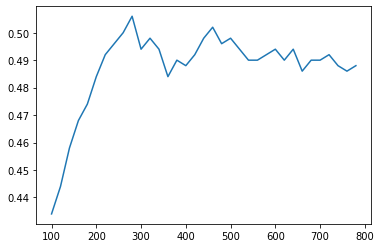

In [111]:
plt.plot(range(100,800,20), accs)

In [128]:
logistic_model_final =LogisticRegression(C=0.01,
                                         dual=False,
                                         fit_intercept=True,
                                         intercept_scaling=1,
                                         max_iter=300,
                                         multi_class='multinomial',
                                         penalty='l2',
                                         solver='newton-cg',
                                         tol=0.0001)

In [2]:
path = 'C:/Users/jiaoh/Documents/GitHub/Spring2020-Project3-group2/hanbojiao_test/data/train_set/'
data=load.load_data(path+ "label.csv")

points_path= 'C:/Users/jiaoh/Documents/GitHub/Spring2020-Project3-group2/hanbojiao_test/data/train_set/points/'
X=load.load_points(points_path,data)
y=data["emotion_idx"].to_numpy()


--- 9.104433298110962 seconds ---


In [3]:
from sklearn.model_selection import train_test_split as tts
data_unsplit = pd.read_csv(path + "data_unsplit.csv")
X_dis=data_unsplit.iloc[:,1:-1]
y_dis=data_unsplit["emotion_idx"]
train_x_dis,test_x_dis,train_y_dis,test_y_dis=tts(X_dis,y_dis,test_size=0.2,random_state=3662)

In [4]:
import xgboost
from sklearn.model_selection import GridSearchCV
xgboost_parm_gs = {
     'max_depth':[2,4,8,12,16,20] ,
    'n_estimator': [50,100],
    'learning_rate': [0.1,0.05,0.01]
}
xgboost_model_gs = xgboost.XGBClassifier()
xgboost_gsearch = GridSearchCV(estimator = xgboost_model_gs, 
                        param_grid = xgboost_parm_gs, 
                        scoring ='accuracy',
                        cv = 3,
                        n_jobs = 10,
                        verbose=3,
                        return_train_score=True
                       )
xgboost_gsearch.fit(train_x_dis,train_y_dis)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed: 34.8min
[Parallel(n_jobs=10)]: Done 108 out of 108 | elapsed: 316.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     

In [12]:
from sklearn.metrics import accuracy_score  
print("Training dataset Accuracy")
train_preds = xgboost_gsearch.predict(train_x_dis)
train_accuracy = accuracy_score(train_y_dis, train_preds) 
print(train_accuracy)

Training dataset Accuracy
1.0


In [13]:
print("Testing dataset Accuracy")
test_preds = xgboost_gsearch.predict(test_x_dis)
test_accuracy = accuracy_score(test_y_dis, test_preds) 
print(test_accuracy)

Testing dataset Accuracy
0.426


In [14]:
xgboost_gsearch.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimator': 50}

In [15]:
t0 = time.time()
xgboost_model_final =xgboost.XGBClassifier(**xgboost_gsearch.best_params_)
xgboost_model_final.fit(X_dis,y_dis)
print("done in %0.3fs" % (time.time() - t0))

done in 240.241s


In [28]:
from sklearn.externals import joblib
joblib.dump(xgboost_model_final,'xgboost_model_final.m')

E:\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['xgboost_model_final.m']

In [ ]:
#joblib.load('C:/Users/jiaoh/Documents/GitHub/Spring2020-Project3-group2/hanbojiao_test/doc/xgboost_model_final.m')